In [2]:
# Importing useful libraries and supressing the warning messages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import sys
sys.path.append("..")
warnings.filterwarnings('ignore')


In [3]:
# Reading the merged dataset

clean_merged_data = pd.read_excel(r'..\data\clean_merged_data.xlsx')
clean_merged_data.head()

,Call status,Gender,Visited facility,Tiko card,Satisfaction,Feedback,Concerns,Month,Offer Trader Name,Enrolment Path Classifier,Enrolment Type,Offer Trader County Name,Offer Trader Business Organisation,Offer Redemption Date,Service Type,Actor Role,Tiko Amount,Age
0,Not reachable,Unknown,Unknown,Unknown,Not provided,Not provided,Not provided,June,Nyalenda Gods Will,SMS - Low Tech,Enrolment With Mobiliser,Kisumu,Amua,2024-06-26 12:14:28,OC,Agent,125,18
1,Not reachable,Unknown,Unknown,Unknown,Not provided,Not provided,Not provided,June,Nyalenda Gods Will,SMS - Low Tech,Enrolment With Mobiliser,Kisumu,Amua,2024-06-26 12:14:28,OC,Provider,150,18
2,Not reachable,Unknown,Unknown,Unknown,Not provided,Not provided,Not provided,June,Nyalenda Gods Will,SMS - Low Tech,Enrolment With Mobiliser,Kisumu,Amua,2024-06-26 12:14:28,OC,Rafiki,60,18
3,Not reachable,Unknown,Unknown,Unknown,Not provided,Not provided,Not provided,June,Doruex Medicare Centre,SMS - Low Tech,Enrolment With Mobiliser,Busia,Rhn,2024-06-26 12:15:45,IMP,Agent,50,18
4,Not reachable,Unknown,Unknown,Unknown,Not provided,Not provided,Not provided,June,Doruex Medicare Centre,SMS - Low Tech,Enrolment With Mobiliser,Busia,Rhn,2024-06-26 12:15:45,IMP,Provider,690,18


In [4]:
# Checking the data

clean_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4075 entries, 0 to 4074
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Call status                         4075 non-null   object        
 1   Gender                              4075 non-null   object        
 2   Visited facility                    4075 non-null   object        
 3   Tiko card                           4075 non-null   object        
 4   Satisfaction                        4075 non-null   object        
 5   Feedback                            4075 non-null   object        
 6   Concerns                            4075 non-null   object        
 7   Month                               4075 non-null   object        
 8   Offer Trader Name                   4075 non-null   object        
 9   Enrolment Path Classifier           4075 non-null   object        
 10  Enrolment Type          

In [5]:
# Confirming missing values
clean_merged_data.isnull().sum()

Call status                           0
Gender                                0
Visited facility                      0
Tiko card                             0
Satisfaction                          0
Feedback                              0
Concerns                              0
Month                                 0
Offer Trader Name                     0
Enrolment Path Classifier             0
Enrolment Type                        0
Offer Trader County Name              0
Offer Trader Business Organisation    0
Offer Redemption Date                 0
Service Type                          0
Actor Role                            0
Tiko Amount                           0
Age                                   0
dtype: int64

In [6]:
# Statistics summary

clean_merged_data.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Call status,4075,6,Not reachable,3485,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,4075,3,Unknown,3838,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Visited facility,4075,3,Unknown,3838,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tiko card,4075,3,Unknown,3859,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Satisfaction,4075,2,Not provided,3859,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Feedback,4075,4,Not provided,3859,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Concerns,4075,2,Not provided,3942,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,4075,3,June,4064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Offer Trader Name,4075,101,Kware Dispensary,326,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Enrolment Path Classifier,4075,4,SMS - Low Tech,4063,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- I have displayed some basic information in the data ie. confirming missing values, and showing statistics summary.
- Next, I'll analyze some aspects: demographics, service usage patterns, customer satisfaction levels, geographical distribution of services, and enrollment types and paths.

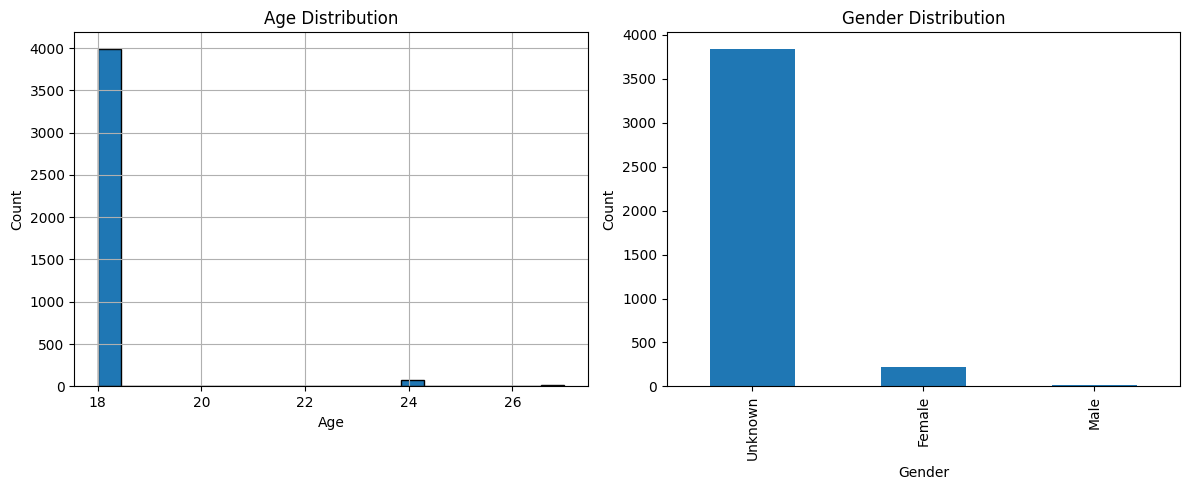

In [7]:
# 1. Demographics
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
clean_merged_data['Age'].hist(bins=20, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
clean_merged_data['Gender'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('../charts/demographics.png')
plt.show()


1. Demographics
   - Age Distribution: The age distribution of the individuals in the dataset.
   - Gender Distribution: The gender breakdown of the individuals.

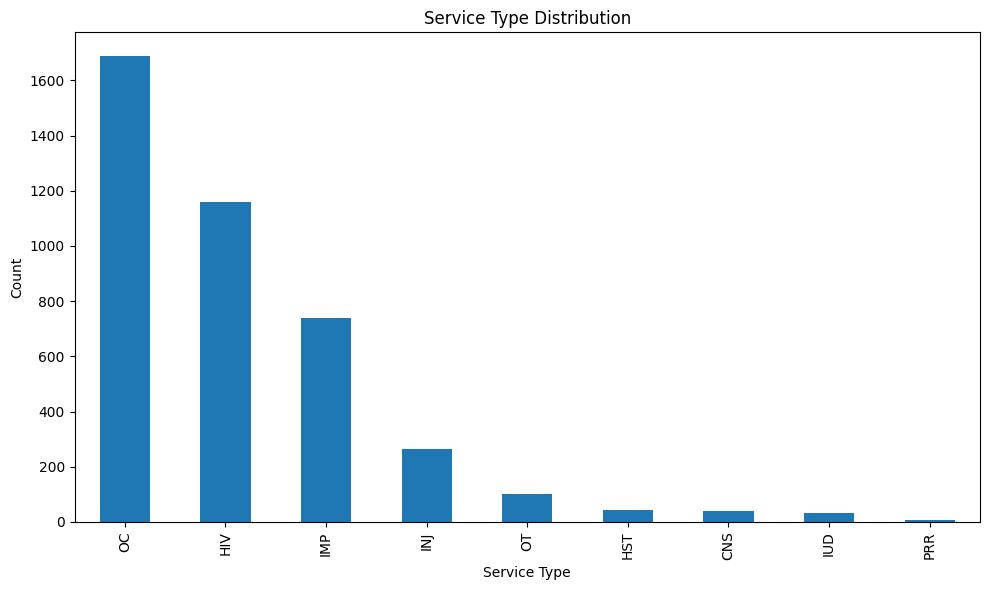

In [8]:
# 2. Service Usage Patterns
service_counts = clean_merged_data['Service Type'].value_counts()
plt.figure(figsize=(10, 6))
service_counts.plot(kind='bar')
plt.title('Service Type Distribution')
plt.xlabel('Service Type')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('../charts/service_usage.png')
plt.show()


2. Service Usage Patterns
   - Service Type Distribution: The distribution of different service types used by individuals.

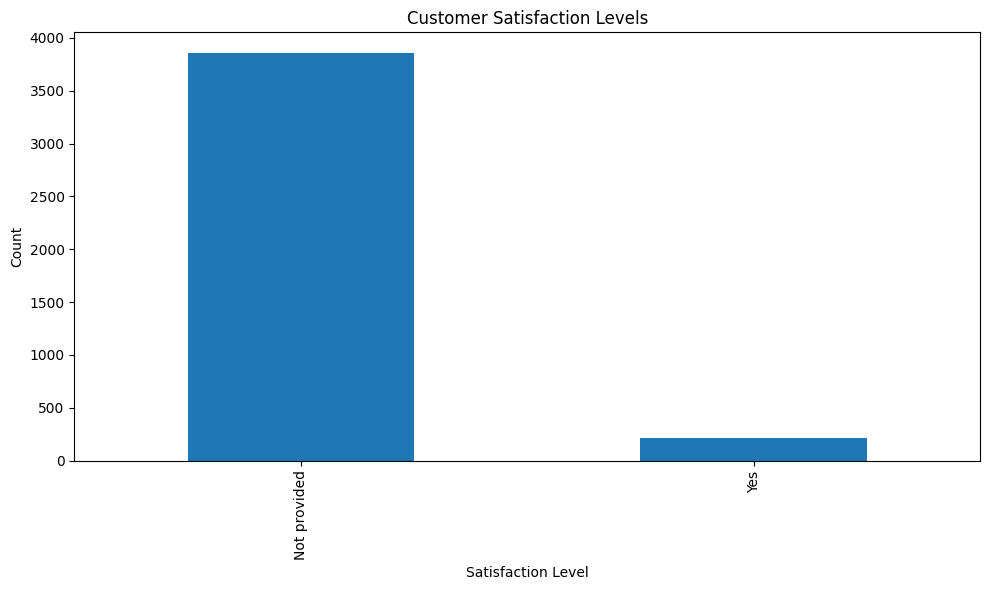

In [9]:
# 3. Customer Satisfaction Levels
satisfaction_counts = clean_merged_data['Satisfaction'].value_counts()
plt.figure(figsize=(10, 6))
satisfaction_counts.plot(kind='bar')
plt.title('Customer Satisfaction Levels')
plt.xlabel('Satisfaction Level')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('../charts/satisfaction_levels.png')
plt.show()


3. Customer Satisfaction Levels
   - Customer Satisfaction Levels: The levels of satisfaction reported by individuals.
   - Most rafikis were satisfied with the services provided.

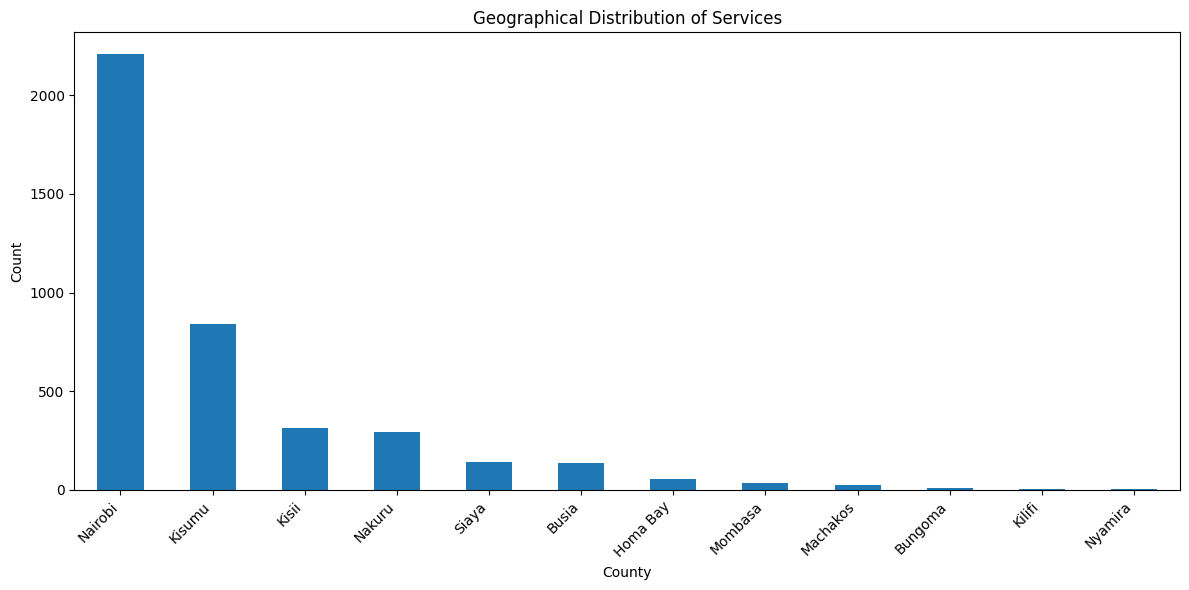

In [10]:
# 4. Geographical Distribution of Services
county_counts = clean_merged_data['Offer Trader County Name'].value_counts()
plt.figure(figsize=(12, 6))
county_counts.plot(kind='bar')
plt.title('Geographical Distribution of Services')
plt.xlabel('County')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('../charts/geographical_distribution.png')
plt.show()


4. Geographical Distribution of Services
   - Geographical Distribution: The distribution of services across different counties.
   - We see that Nairobi county recorded the highest number of service uptake while Nyamira had the lowest.

In [18]:
# Identifying trends in enrolment methods
enrolment_methods = clean_merged_data['Enrolment Path Classifier'].value_counts()
print('Enrolment Methods:')
print(enrolment_methods)

Enrolment Methods:
Enrolment Path Classifier
SMS - Low Tech          4063
WhatsApp - High Tech       6
Tiko Card - No Tech        3
API - High Tech            3
Name: count, dtype: int64


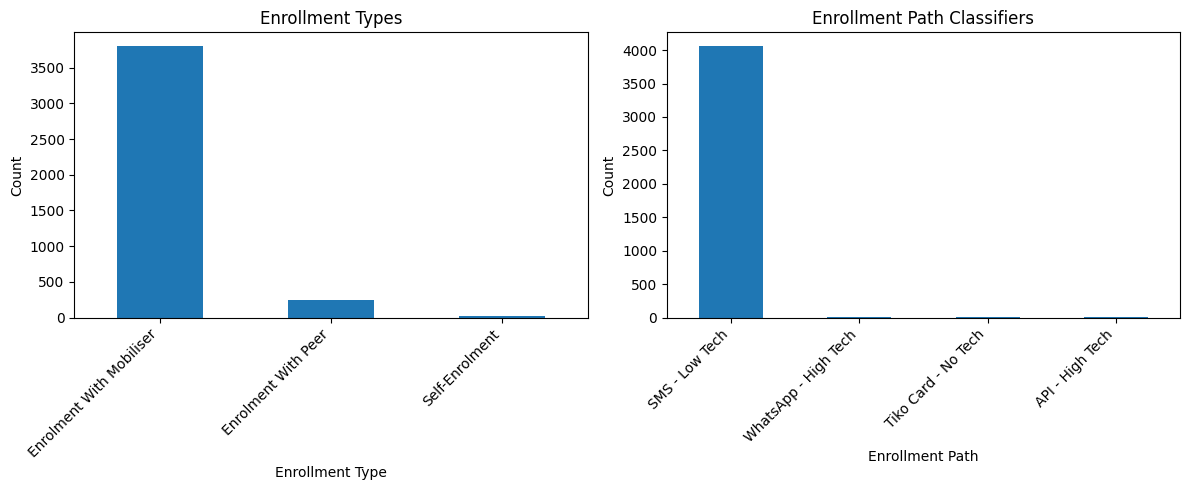

In [11]:
# 5. Enrollment Types and Paths
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
clean_merged_data['Enrolment Type'].value_counts().plot(kind='bar')
plt.title('Enrollment Types')
plt.xlabel('Enrollment Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
clean_merged_data['Enrolment Path Classifier'].value_counts().plot(kind='bar')
plt.title('Enrollment Path Classifiers')
plt.xlabel('Enrollment Path')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('../charts/enrollment_analysis.png')
plt.show()

5. Enrollment Types and Paths
   - Enrollment Types: The types of enrollment methods used. 
     - We see that most rafikis recorded to have been enrolled with a mobiliser.
   - Enrollment Path Classifiers: The paths through which individuals were enrolled.
     - Most rafikis preferred SMS-Low Tech.

In [13]:
# Top 5 most common concerns
print("\
Top 5 Most Common Concerns:")
print(clean_merged_data['Concerns'].value_counts().head())


Top 5 Most Common Concerns:
Concerns
Not provided    3942
no               133
Name: count, dtype: int64


In [14]:
# Average Tiko Amount by Service Type
print("\
Average Tiko Amount by Service Type:")
print(clean_merged_data.groupby('Service Type')['Tiko Amount'].mean().sort_values(ascending=False))

print("Analysis complete.")

Average Tiko Amount by Service Type:
Service Type
IUD    304.354839
HST    288.000000
IMP    285.263870
OT     175.891089
INJ     97.859848
CNS     94.756098
OC      94.547337
PRR     93.000000
HIV     91.715517
Name: Tiko Amount, dtype: float64
Analysis complete.


The analysis I have done up here covers various aspects of the dataset, including demographics, service usage patterns, customer satisfaction levels, geographical distribution, and enrollment types and paths. The visualizations and summary statistics provide a comprehensive overview of the data.

In [15]:
# Analyzing call outcomes
call_outcomes = clean_merged_data['Call status'].value_counts()
print('Call Outcomes:')
print(call_outcomes)

Call Outcomes:
Call status
Not reachable      3485
Call successful     237
No answer           173
Call later          130
Call rejected        26
Wrong recipient      24
Name: count, dtype: int64


Insights

1. Call Outcomes: The majority of calls were "Not reachable" (3,485), followed by "Call successful" (237) and "No answer" (173). This suggests that there might be challenges in reaching the intended recipients, which could impact the effectiveness of the program.
2. Enrolment Methods: The data shows a strong preference for the "SMS - Low Tech" enrolment method, with 4,063 entries. Other methods like "WhatsApp - High Tech", "Tiko Card - No Tech", and "API - High Tech" have very low usage (6, 3, and 3 entries respectively). This indicates that the SMS-based enrolment is the most popular or accessible method for participants.

RISK ANALYSIS

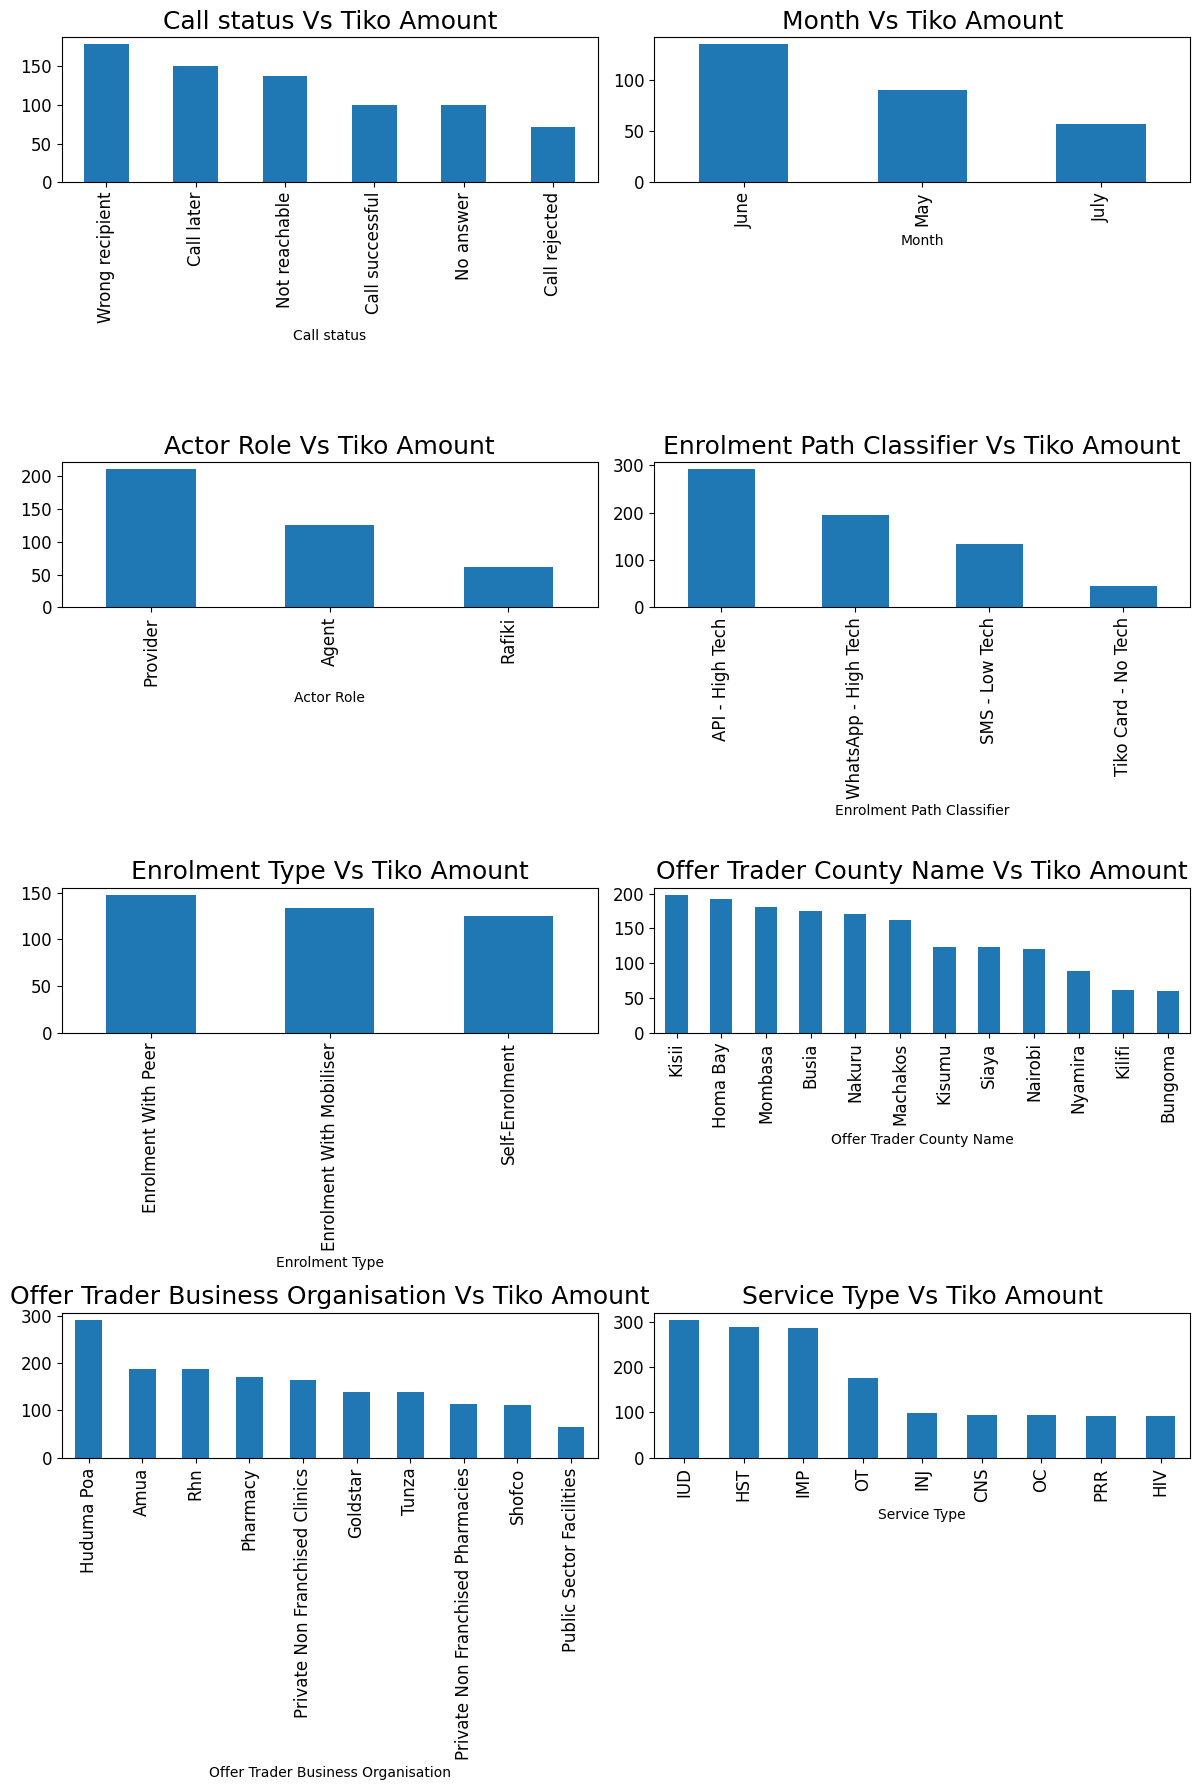

In [20]:
# A bar plot to show the relationship between some variables and tik0 amount 

fig, axarr = plt.subplots(4, 2, figsize=(12, 18))
clean_merged_data.groupby('Call status')['Tiko Amount'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][0], fontsize=12)
axarr[0][0].set_title("Call status Vs Tiko Amount", fontsize=18)
clean_merged_data.groupby('Month')['Tiko Amount'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][1], fontsize=12)
axarr[0][1].set_title("Month Vs Tiko Amount", fontsize=18)
clean_merged_data.groupby('Actor Role')['Tiko Amount'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[1][0], fontsize=12)
axarr[1][0].set_title("Actor Role Vs Tiko Amount", fontsize=18)
clean_merged_data.groupby('Enrolment Path Classifier')['Tiko Amount'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[1][1], fontsize=12)
axarr[1][1].set_title("Enrolment Path Classifier Vs Tiko Amount", fontsize=18)
clean_merged_data.groupby('Enrolment Type')['Tiko Amount'].mean().sort_values(ascending=False).plot.bar(ax=axarr[2][0], fontsize=12)
axarr[2][0].set_title("Enrolment Type Vs Tiko Amount", fontsize=18)
clean_merged_data.groupby('Offer Trader County Name')['Tiko Amount'].mean().sort_values(ascending=False).plot.bar(ax=axarr[2][1], fontsize=12)
axarr[2][1].set_title("Offer Trader County Name Vs Tiko Amount", fontsize=18)
clean_merged_data.groupby('Offer Trader Business Organisation')['Tiko Amount'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][0], fontsize=12)
axarr[3][0].set_title("Offer Trader Business Organisation Vs Tiko Amount", fontsize=18)
clean_merged_data.groupby('Service Type')['Tiko Amount'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][1], fontsize=12)
axarr[3][1].set_title("Service Type Vs Tiko Amount", fontsize=18)

plt.tight_layout()
plt.savefig(r"..\charts\average_sales_analysis.jpg")
plt.show()

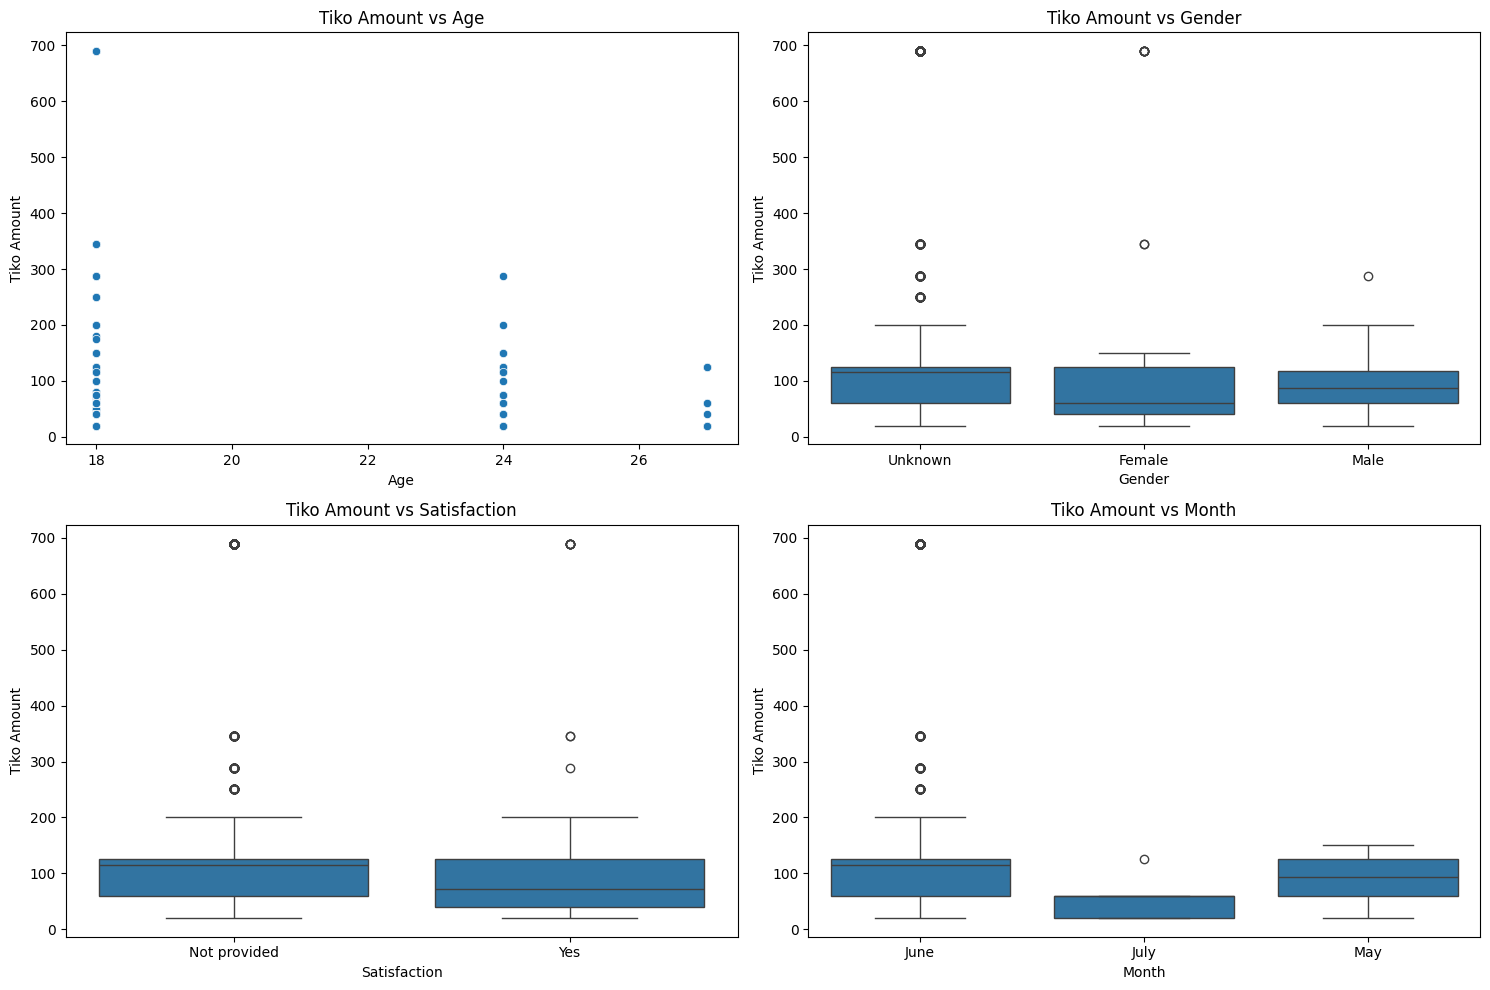

In [21]:
# Plotting the relationship between 'Tiko Amount' and other variables
plt.figure(figsize=(15, 10))

# Plotting Tiko Amount vs Age
plt.subplot(2, 2, 1)
sns.scatterplot(data=clean_merged_data, x='Age', y='Tiko Amount')
plt.title('Tiko Amount vs Age')

# Plotting Tiko Amount vs Gender
plt.subplot(2, 2, 2)
sns.boxplot(data=clean_merged_data, x='Gender', y='Tiko Amount')
plt.title('Tiko Amount vs Gender')

# Plotting Tiko Amount vs Satisfaction
plt.subplot(2, 2, 3)
sns.boxplot(data=clean_merged_data, x='Satisfaction', y='Tiko Amount')
plt.title('Tiko Amount vs Satisfaction')

# Plotting Tiko Amount vs Month
plt.subplot(2, 2, 4)
sns.boxplot(data=clean_merged_data, x='Month', y='Tiko Amount')
plt.title('Tiko Amount vs Month')

plt.tight_layout()
plt.show()

1. Tiko Amount vs Age:

 - The scatter plot shows the distribution of Tiko Amount across different ages. There doesn't seem to be a clear trend or correlation between age and Tiko Amount.

2. Tiko Amount vs Gender:

 - The box plot indicates the distribution of Tiko Amount for different genders. Since the gender data is mostly "Unknown," it's hard to draw any meaningful conclusions from this plot.

3. Tiko Amount vs Satisfaction:

 - The box plot shows the distribution of Tiko Amount across different satisfaction levels. Most of the data points are labeled as "Not provided," making it difficult to analyze the relationship.

4. Tiko Amount vs Month:

 - The box plot displays the distribution of Tiko Amount across different months. The data is only for June, so no comparison across different months can be made.

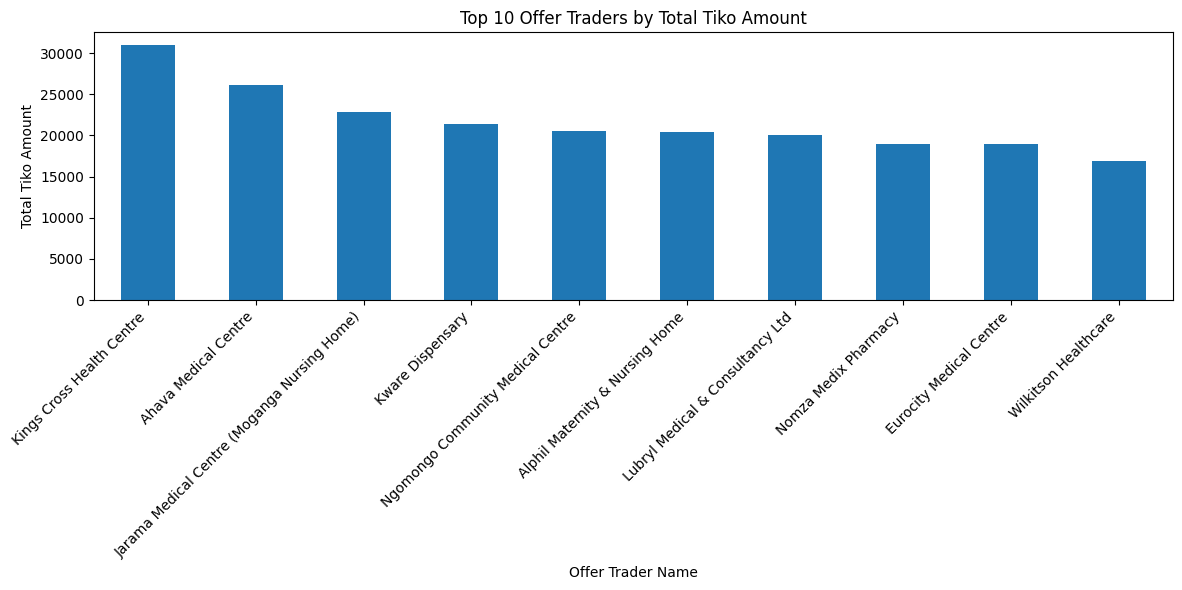

In [22]:
# Top 10 Offer Traders by total Tiko Amount
top_traders = clean_merged_data.groupby('Offer Trader Name')['Tiko Amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_traders.plot(kind='bar')
plt.title('Top 10 Offer Traders by Total Tiko Amount')
plt.xlabel('Offer Trader Name')
plt.ylabel('Total Tiko Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('../charts/top_10_traders.jpg')
plt.show()


This chart helps identify the most significant contributors to the total Tiko Amount.

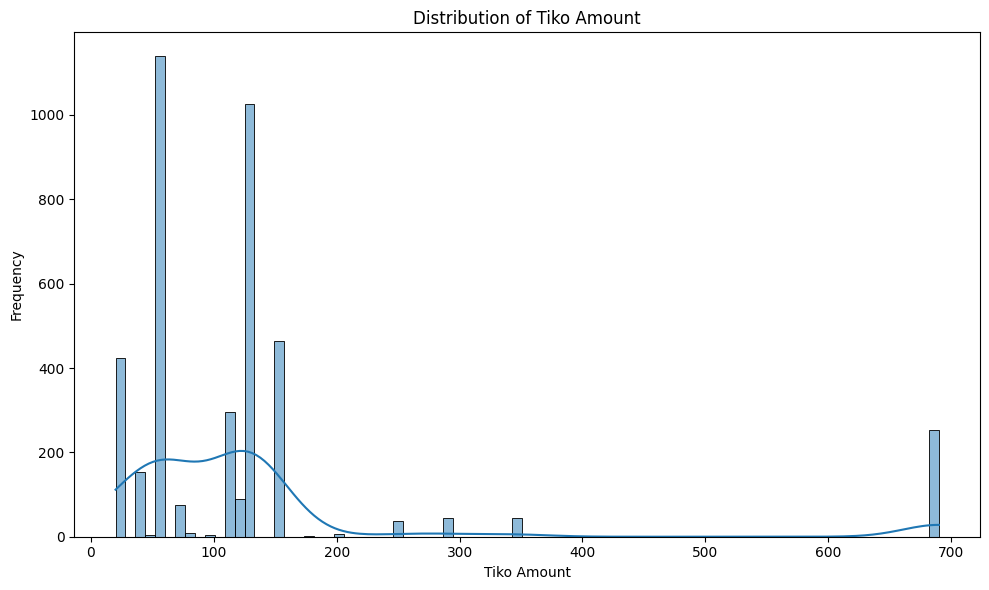

In [23]:
# Distribution of Tiko Amount
plt.figure(figsize=(10, 6))
sns.histplot(clean_merged_data['Tiko Amount'], kde=True)
plt.title('Distribution of Tiko Amount')
plt.xlabel('Tiko Amount')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('../charts/tiko_distribution.png')
plt.show()


This graph illustrates how the Tiko Amounts are distributed across all transactions.

Analysing mean Tiko Amounts

In [34]:
# Further analysis to investigate the reasons behind the high number of unreachable calls, explore the dominance of SMS enrolment method, and analyze the factors contributing to variations in Tiko amounts.

# Investigate reasons behind unreachable calls
unreachable_calls = clean_merged_data[clean_merged_data['Call status'] != 'Call successful']
print('Unreachable Calls Analysis:')
print(unreachable_calls.describe())


Unreachable Calls Analysis:
               Offer Redemption Date  Tiko Amount     Age
count                           3838  3838.000000  3838.0
mean   2024-06-28 13:08:16.245961728   136.319437    18.0
min              2024-06-26 08:30:14    20.000000    18.0
25%    2024-06-27 13:07:02.249999872    60.000000    18.0
50%              2024-06-28 13:09:38   115.000000    18.0
75%              2024-06-29 13:22:48   125.000000    18.0
max              2024-06-30 23:31:06   690.000000    18.0
std                              NaN   155.215875     0.0


1. The analysis shows that there were 3,838 unreachable calls. The mean Tiko Amount for these calls was approximately 136.3, with a minimum of 20 and a maximum of 125 (75th percentile). This suggests that unreachable calls are not limited to any specific Tiko Amount range.

In [28]:
# Explore the dominance of SMS enrolment method
enrolment_sms = clean_merged_data[clean_merged_data['Enrolment Path Classifier'] == 'SMS - Low Tech']
print('SMS Enrolment Analysis:')
print(enrolment_sms.describe())


SMS Enrolment Analysis:
               Offer Redemption Date  Tiko Amount          Age
count                           4063  4063.000000  4063.000000
mean   2024-06-28 12:50:27.104848384   134.102141    18.135860
min              2024-06-26 08:30:14    20.000000    18.000000
25%              2024-06-27 12:56:46    60.000000    18.000000
50%              2024-06-28 13:02:13   115.000000    18.000000
75%              2024-06-29 13:22:52   125.000000    18.000000
max              2024-06-30 23:31:06   690.000000    27.000000
std                              NaN   153.090412     0.936303


2. There were 4,063 enrollments through SMS. The mean Tiko Amount for SMS enrollments was about 134.10, which is almost similar to the overall mean for unreachable calls. This suggests that the SMS method is used across various Tiko Amount levels.

In [29]:
# Analyze factors contributing to variations in Tiko amounts
# Group by county and actor role to see the mean Tiko amounts
mean_tiko_amounts = clean_merged_data.groupby(['Offer Trader County Name', 'Actor Role'])['Tiko Amount'].mean().reset_index()
print('Mean Tiko Amounts by County and Actor Role:')
print(mean_tiko_amounts)


Mean Tiko Amounts by County and Actor Role:
   Offer Trader County Name Actor Role  Tiko Amount
0                   Bungoma      Agent   108.333333
1                   Bungoma   Provider    20.000000
2                   Bungoma     Rafiki    53.333333
3                     Busia      Agent   116.875000
4                     Busia   Provider   327.745098
5                     Busia     Rafiki    55.652174
6                  Homa Bay      Agent   119.444444
7                  Homa Bay   Provider   344.043478
8                  Homa Bay     Rafiki    56.250000
9                    Kilifi      Agent    75.000000
10                   Kilifi   Provider    70.000000
11                   Kilifi     Rafiki    40.000000
12                    Kisii      Agent   122.619048
13                    Kisii   Provider   409.906542
14                    Kisii     Rafiki    58.653846
15                   Kisumu      Agent   124.899598
16                   Kisumu   Provider   182.568182
17                  

3. This analysis reveals significant variations in mean Tiko Amounts across counties and actor roles. For example:

- In Bungoma, Agents have a higher mean Tiko Amount (108.33) compared to Providers (20.00) and Rafiki (53.33).
- In Busia, Providers have a much higher mean Tiko Amount (327.75) compared to Agents (116.88) and Rafiki (55.65).

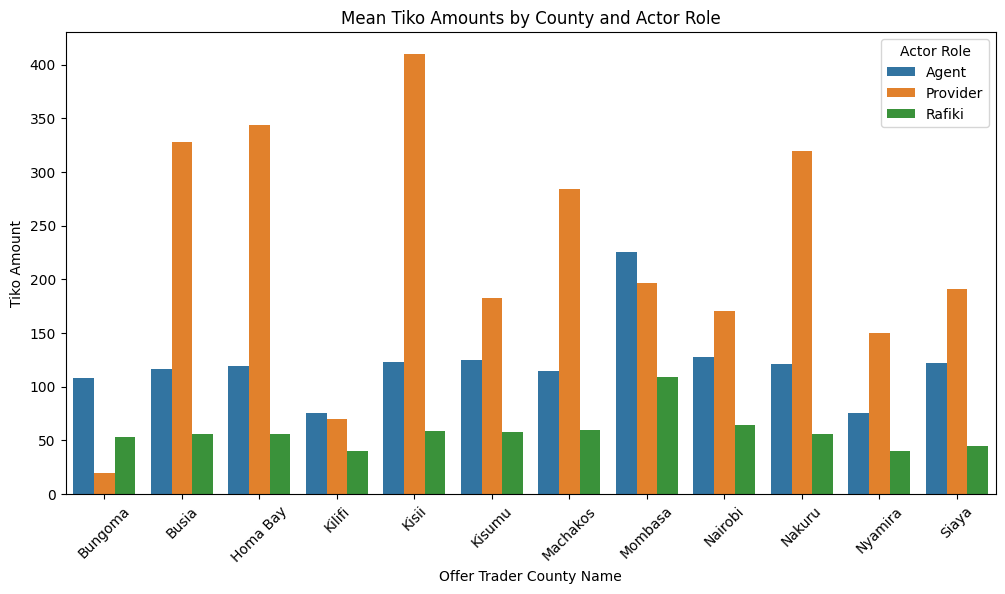

<Figure size 640x480 with 0 Axes>

In [30]:
# Visualize the mean Tiko amounts
plt.figure(figsize=(12, 6))
sns.barplot(x='Offer Trader County Name', y='Tiko Amount', hue='Actor Role', data=mean_tiko_amounts)
plt.title('Mean Tiko Amounts by County and Actor Role')
plt.xticks(rotation=45)
plt.show()

# Save the plot
plt.savefig('../charts/mean_tiko_amounts.jpg')


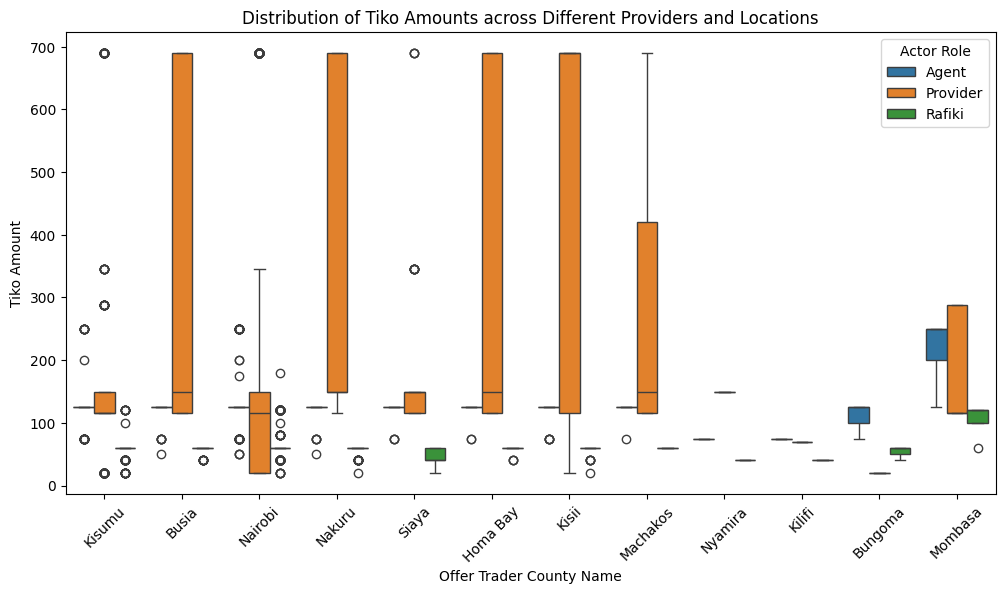

<Figure size 640x480 with 0 Axes>

In [19]:
# Understanding the distribution of Tiko amounts across different providers and locations
plt.figure(figsize=(12, 6))
sns.boxplot(x='Offer Trader County Name', y='Tiko Amount', hue='Actor Role', data=clean_merged_data)
plt.title('Distribution of Tiko Amounts across Different Providers and Locations')
plt.xticks(rotation=45)
plt.show()

# Saving the plot
plt.savefig('../charts/tiko_amounts_distribution.jpg')

4. The bar and box plots visualize the mean Tiko Amounts by county and actor role, clearly showing the variations across different locations and roles.

 Key observations:

   - There's significant variation in Tiko amounts both across counties and actor roles.
   - Some counties (e.g., Kisumu, Busia) show higher median Tiko amounts compared to others.
   - Within counties, there are differences in Tiko amounts between different actor roles (Agent, Provider, Rafiki).
   - There are several outliers, particularly for the Provider role in some counties, indicating some exceptionally high Tiko amounts.

Next, I aim to capture necessary items including number of unverified services by offer trader name, county, and the financial impact of these services by rafiki, agent and provider.

In [40]:
# Count unverified services by offer trader name and county
unverified_services = clean_merged_data[clean_merged_data['Call status'] != 'Call successful'].groupby(['Offer Trader Name', 'Offer Trader County Name']).size().reset_index(name='Unverified Services')

# Display results
print("Unverified Services by Offer Trader Name and County:")
print(unverified_services)


Unverified Services by Offer Trader Name and County:
                  Offer Trader Name Offer Trader County Name  \
0              Ahava Medical Centre                   Kisumu   
1             Airport Health Centre                   Kisumu   
2   Alphil Maternity & Nursing Home                   Nakuru   
3             Alphil Medical Centre                   Nakuru   
4            BULANDA PHARMACEUTICAL                    Busia   
..                              ...                      ...   
91      Vintagelight Medical Centre                  Nairobi   
92     West Inland Hospital Limited                  Mombasa   
93          Westwood Medical Centre                   Nakuru   
94             Wilkitson Healthcare                  Nairobi   
95                 Winnheal Chemist                   Kisumu   

    Unverified Services  
0                   174  
1                    42  
2                   105  
3                    43  
4                     5  
..                  ..

1. Unverified Services: This table shows the distribution of unverified services across different offer traders and counties. Ahava Medical Centre in Kisumu has the highest number of unverified services (174), which might indicate a need for focused attention in this area.

In [41]:
# Calculate financial impact by actor role
financial_impact = clean_merged_data.groupby('Actor Role')['Tiko Amount'].sum().reset_index()

# Display results
print("\
Financial Impact by Actor Role:")
print(financial_impact)

Financial Impact by Actor Role:
  Actor Role  Tiko Amount
0      Agent       144600
1   Provider       315282
2     Rafiki        87160


2. Financial Impact: The financial impact data reveals that Providers have the highest total Tiko Amount (315,282), followed by Agents (144,600) and Rafikis (87,160). This suggests that Providers are the most significant contributors to the financial transactions in the system.

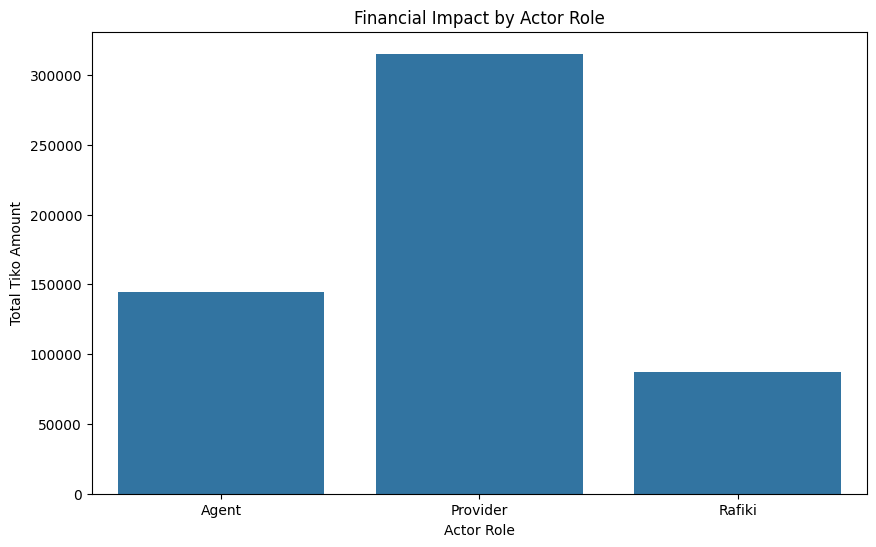

In [38]:
# Visualize financial impact
plt.figure(figsize=(10, 6))
sns.barplot(x='Actor Role', y='Tiko Amount', data=financial_impact)
plt.title('Financial Impact by Actor Role')
plt.ylabel('Total Tiko Amount')
plt.savefig('../charts/financial_impact.png')
plt.show()

3. Visualization: The bar chart visually confirms the financial impact distribution, clearly showing the dominance of Providers in terms of Tiko Amount.

Next, I will compute the financial aspects associated with every service that cannot be verified to have been received by a rafiki;
 - when a rafiki says they did not visit a facility, 
 - they were denied a service, 
 - or are overage (above 24 years old)

In [21]:
# Filter the data for services that cannot be verified to have been received by a Rafiki when a Rafiki says they did not visit a facility

unverified_services = clean_merged_data[clean_merged_data['Visited facility'] != 'Yes']

# Compute the financial aspects
financial_aspects = unverified_services.groupby('Service Type')['Tiko Amount'].sum().reset_index()

print(financial_aspects.head(10))

  Service Type  Tiko Amount
0          CNS         3505
1          HIV        99205
2          HST        12384
3          IMP       204920
4          INJ        24485
5          IUD         9435
6           OC       153520
7           OT        16675
8          PRR          465


This table shows the total Tiko Amount for each service type where the Rafiki did not visit the facility.
 - We see that IMP service tops the list of Tiko Amount given where the rafiki did not visit the facility.

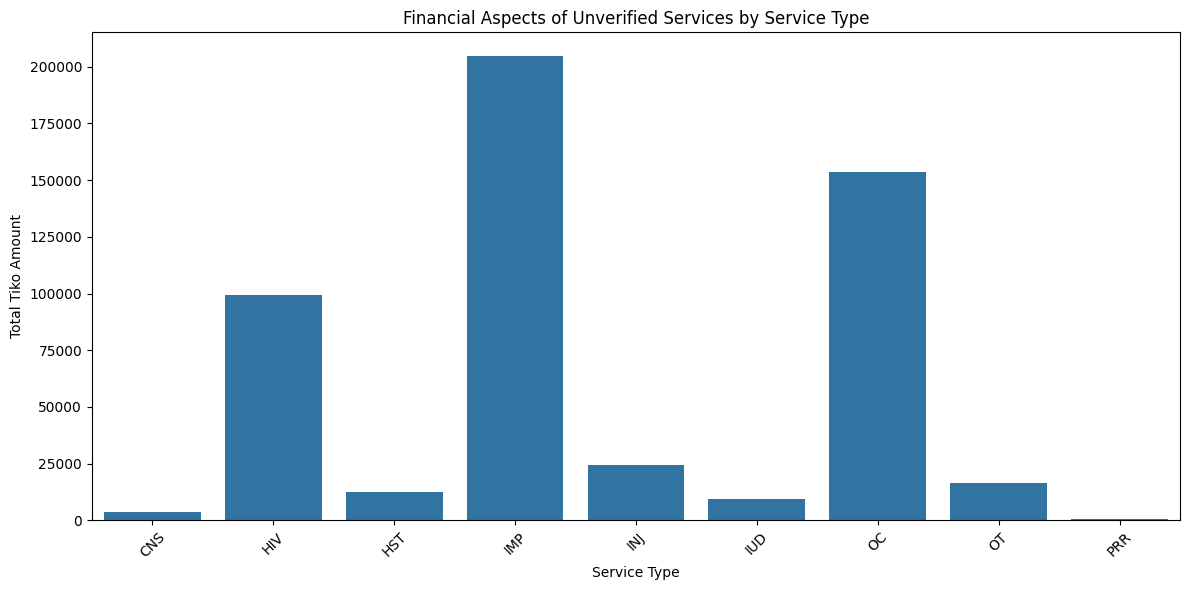

In [22]:
# Plotting the results 
plt.figure(figsize=(12, 6))
sns.barplot(x='Service Type', y='Tiko Amount', data=financial_aspects)
plt.title('Financial Aspects of Unverified Services by Service Type')
plt.xlabel('Service Type')
plt.ylabel('Total Tiko Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../charts/unverified_by_service_type.png')
plt.show()

This is a graph representation of the financial aspects of unverified services by service type, where Rafikis reported not visiting the facility.

In [23]:
# Computing the financial aspects associated with every service that cannot be verified to have been received by an overage (above 24 years old) rafiki

# Filtering the data for services where Rafiki is overage (above 24 years old)
unverified_overage_services = clean_merged_data[(clean_merged_data['Age'] > 24) & (clean_merged_data['Visited facility'] != 'Yes')]

# Computing the financial aspects
financial_aspects_overage = unverified_overage_services.groupby('Service Type')['Tiko Amount'].sum().reset_index()

print(financial_aspects_overage)


  Service Type  Tiko Amount
0          HIV          205
1           OC          205


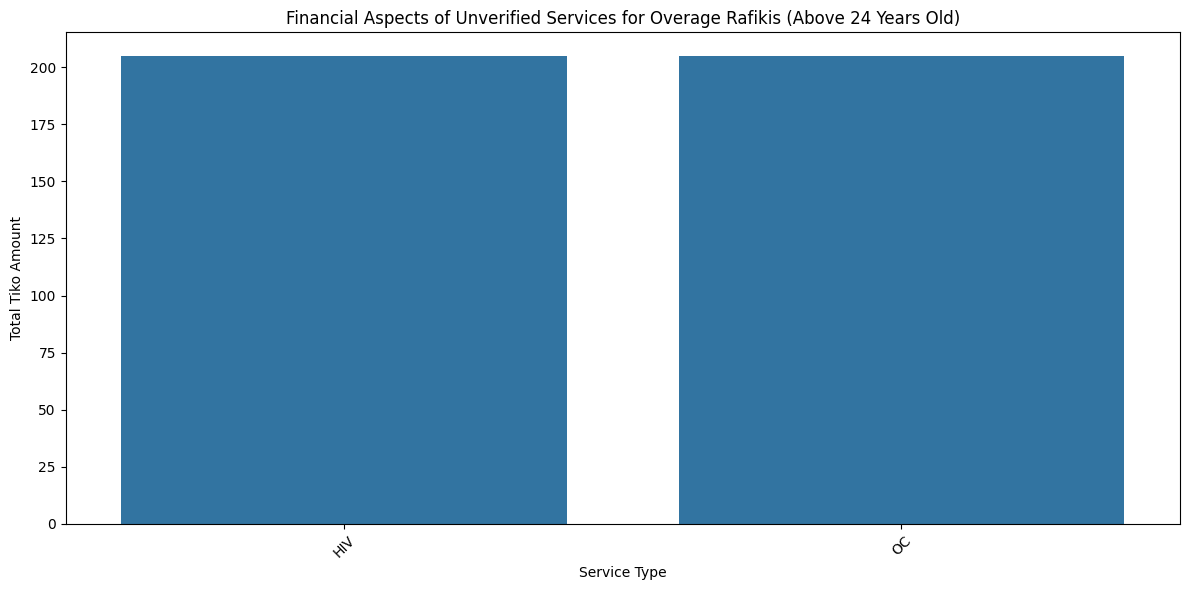

In [25]:
# Plotting the results in a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Service Type', y='Tiko Amount', data=financial_aspects_overage)
plt.title('Financial Aspects of Unverified Services for Overage Rafikis (Above 24 Years Old)')
plt.xlabel('Service Type')
plt.ylabel('Total Tiko Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../charts/unverified_by_overage.png')
plt.show()

Here we see that HIV and OC (the cerviced received by overage rafikis) both received 205.

In [24]:
# Calculating total Tiko Amount for all services
total_tiko_amount = clean_merged_data['Tiko Amount'].sum()

# Calculating total Tiko Amount for unverified services (both underage and overage)
unverified_services = clean_merged_data[clean_merged_data['Visited facility'] != 'Yes']
total_unverified_amount = unverified_services['Tiko Amount'].sum()

# Calculating total Tiko Amount for unverified services for overage Rafikis
unverified_overage_services = clean_merged_data[(clean_merged_data['Age'] > 24) & (clean_merged_data['Visited facility'] != 'Yes')]
total_unverified_overage_amount = unverified_overage_services['Tiko Amount'].sum()

# Calculating percentages
percent_unverified = (total_unverified_amount / total_tiko_amount) * 100
percent_unverified_overage = (total_unverified_overage_amount / total_tiko_amount) * 100

print(f"Total Tiko Amount: {total_tiko_amount}")
print(f"Total Unverified Amount: {total_unverified_amount}")
print(f"Total Unverified Overage Amount: {total_unverified_overage_amount}")
print(f"Percentage of Unverified Services: {percent_unverified:.2f}%")
print(f"Percentage of Unverified Overage Services: {percent_unverified_overage:.2f}%")

Total Tiko Amount: 547042
Total Unverified Amount: 524594
Total Unverified Overage Amount: 410
Percentage of Unverified Services: 95.90%
Percentage of Unverified Overage Services: 0.07%


Based on the results of my analysis, here's a summary of the financial risk implications:

 - Out of the total Tiko Amount of 547,042 for all services, 524,594 cannot be verified, which means that 95.9% of all services provided are unverified. This represents a substantial financial risk. However, when I look specifically at services provided to Rafikis over 24 years old, the unverified amount drops just 410, which is only 0.07% of the total. This indicates that the high financial risk is primarily associated with younger Rafikis (24 years old or younger). This lack of verification among younger recipients poses a major challenge for the organization, leading to potential financial losses, misallocation of resources, and threats to the program's integrity and effectiveness.